## Import Requirements and Master Dataset

In [1]:
# requirements
import numpy as np
import pandas as pd
import os
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# double check master dataset file name
os.listdir('clean_datasets/')

['.DS_Store',
 'opening-dates-clean-v1.csv',
 'data-clean-v2.csv',
 'data-clean-v1.csv']

In [3]:
# dataset 1
df = pd.read_csv('clean_datasets/data-clean-v2.csv')
df.head()

date          selina selina_country selina_opening_date  \
0  2017-12-01        San Jose     Costa Rica          2016-11-01   
1  2017-12-01        Medellin       Colombia          2017-06-01   
2  2017-12-01            Jaco     Costa Rica          2017-06-01   
3  2017-12-01  Bocas del Toro         Panama          2014-12-01   
4  2017-12-01        Red Frog         Panama          2016-11-01   

   month_of_opening  year_of_opening sub_category  capacity  out_of_order  \
0                11             2016         Dorm        86             1   
1                 6             2017         Dorm       215            25   
2                 6             2017         Dorm       118             2   
3                12             2014         Dorm       154             2   
4                11             2016         Dorm        24             1   

   available_beds  sold_beds  occupancy_rate  room_revenue_usd  \
0              85         65        0.764706            1170.0   
1             190         91        0.478947            1820.0   
2             116         55        0.474138             880.0   
3             152        108        0.710526            1728.0   
4              23         17        0.739130             255.0   

   food_and_beverage_revenue  activities_revenue  co_working_revenue  \
0                    341.640             179.010              79.560   
1                    373.100             274.820              72.800   
2                    289.520             100.320              23.760   
3                    618.624             390.528             164.160   
4                     91.545              44.880              20.655   

   total_revenue  trevpob  average_guest_review  
0       1770.210   27.234                 8.755  
1       2540.720   27.920                 8.787  
2       1293.600   23.520                 8.780  
3       2901.312   26.864                 8.689  
4        412.080   24.240                 8.754

### Re-Convert Dtypes Lost in .csv Files:

#### Code:

In [4]:
# datetime
df.date = pd.to_datetime(df.date)
df.selina_opening_date = pd.to_datetime(df.selina_opening_date)

# categorical
columns_to_convert_to_cat = ['selina', 'selina_country', 'month_of_opening', 'year_of_opening']

for column in columns_to_convert_to_cat:
    df[column] = pd.Categorical(df[column])

#### Test:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19077 entries, 0 to 19076
Data columns (total 19 columns):
date                         19077 non-null datetime64[ns]
selina                       19077 non-null category
selina_country               19077 non-null category
selina_opening_date          19077 non-null datetime64[ns]
month_of_opening             19077 non-null category
year_of_opening              19077 non-null category
sub_category                 19077 non-null object
capacity                     19077 non-null int64
out_of_order                 19077 non-null int64
available_beds               19077 non-null int64
sold_beds                    19077 non-null int64
occupancy_rate               19077 non-null float64
room_revenue_usd             19077 non-null float64
food_and_beverage_revenue    19077 non-null float64
activities_revenue           19077 non-null float64
co_working_revenue           19077 non-null float64
total_revenue                19077 non-null float6

## Building Intuition

### Profile Report

In [6]:
df_profile = ProfileReport(df)
df_profile

/Users/mattames/anaconda3/lib/python3.7/site-packages/astropy/stats/bayesian_blocks.py:434: RuntimeWarning: divide by zero encountered in log
  return N_k * (np.log(N_k) - np.log(T_k))
/Users/mattames/anaconda3/lib/python3.7/site-packages/astropy/stats/bayesian_blocks.py:434: RuntimeWarning: divide by zero encountered in log
  return N_k * (np.log(N_k) - np.log(T_k))


### Scatter Matrix

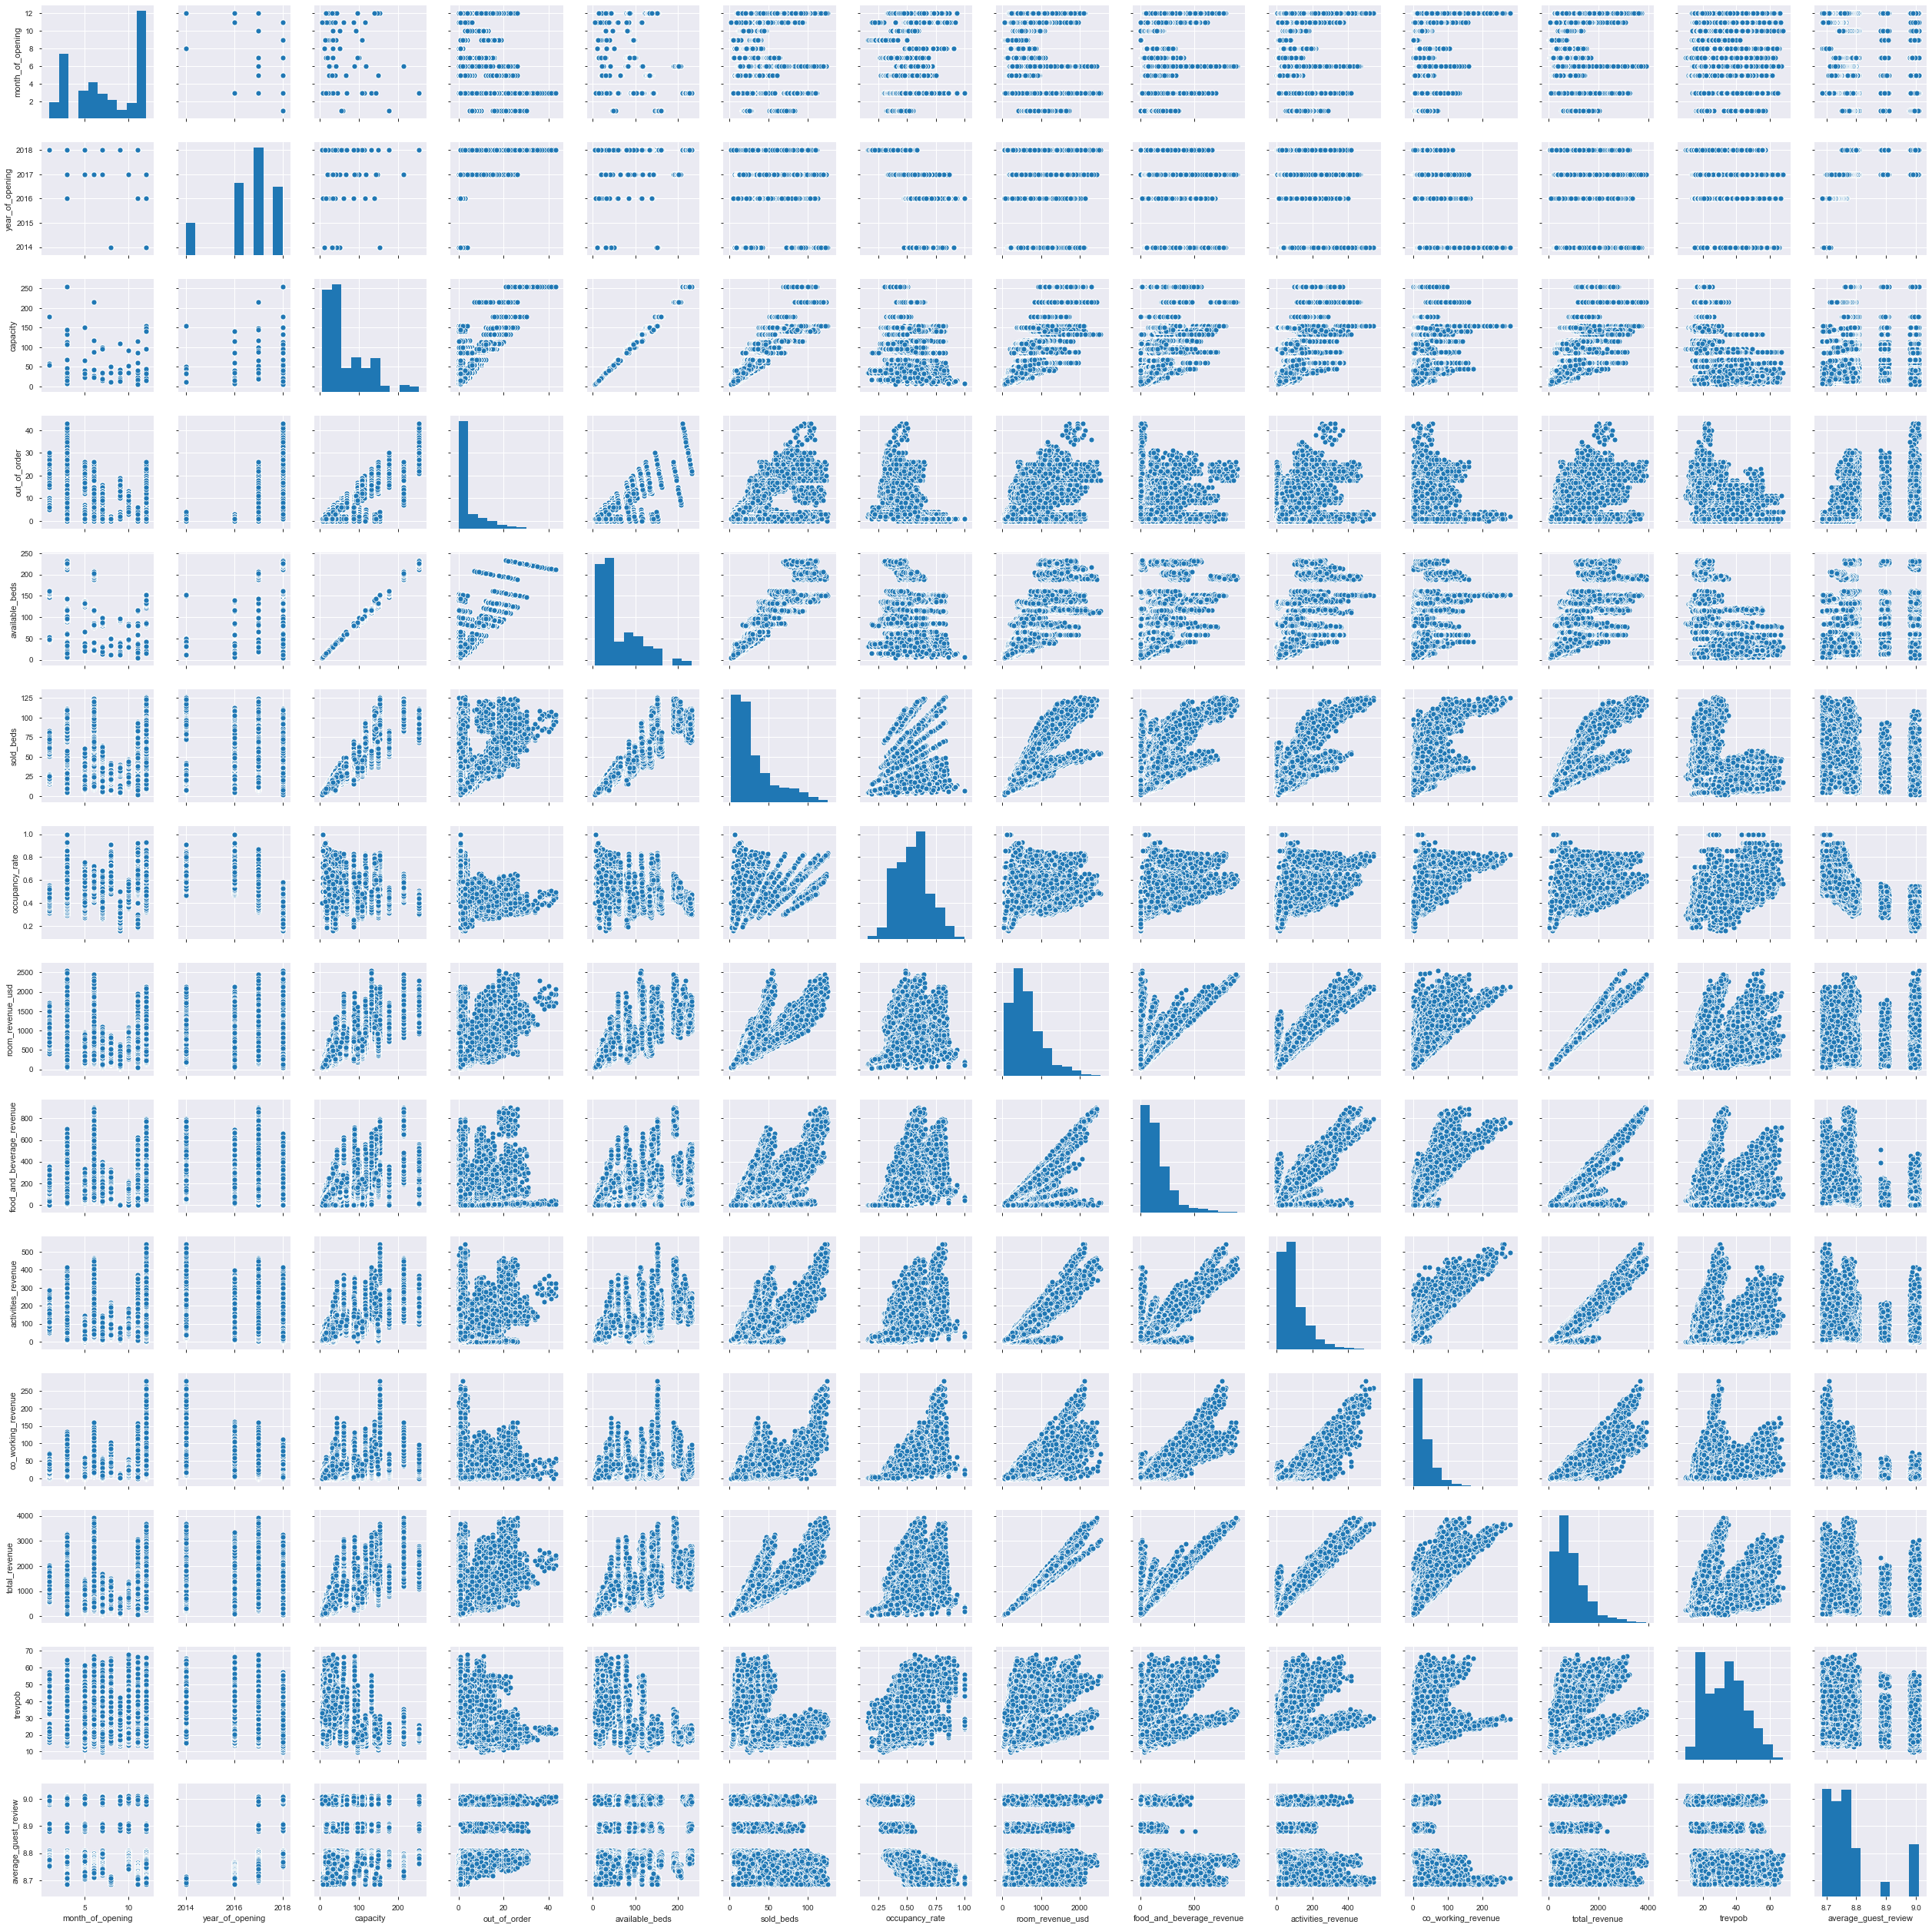

In [7]:
sns.pairplot(df);